> # Introduction to neural network classification with tensorflow
>
> In this notebook we're going to learn how to write neural networks for classification problems.
>
> A classification is where you try to classify something as one thing or another
>
> Few Types of classification problems:
>
> - `Binary` Classification
> - `Mutliclass` Classification
> - `Multilabel` Classification


In [1]:
# important Libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
# Make 1000 samples

n_samples = 1000

# Create Cirlces

X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [3]:
# Check features

X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check labels

y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand... lets `Visualize it`.


In [5]:
circle = pd.DataFrame({"X0" : X[:, 0],
                       "X1" : X[:, 1],
                       "Labels" : y})

In [6]:
# Let's visualize our data

circle

,X0,X1,Labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


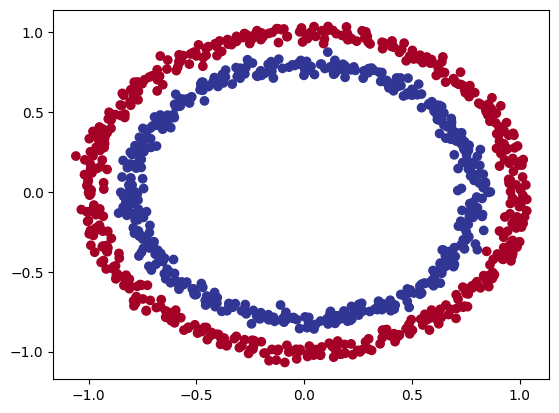

In [7]:
# Visualize our data with plot

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [8]:
# check the shapes our features and labels

X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# how many samples we are working on

len(X), len(y)

(1000, 1000)

In [10]:
# View the exapmles of features and labels

X[4], y[4]

(array([ 0.44220765, -0.89672343]), 0)

### Steps in modelling


In [11]:
#                   1. Create a model_1

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])



#                   2. Compile a model_1

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])



#                   3. Fit the model_1

loss = model_1.fit(X, y, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4952 - loss: 5.8370   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.4851 - loss: 5.1045
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.5086 - loss: 3.8125
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.4845 - loss: 2.3554
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5242 - loss: 0.7226 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5074 - loss: 0.7030 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5152 - loss: 0.6962 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5113 - loss: 0.6934 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.4949 - loss: 0.6939
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4859 - loss: 0.6938 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.4876 - loss: 0.6941
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

<Axes: >

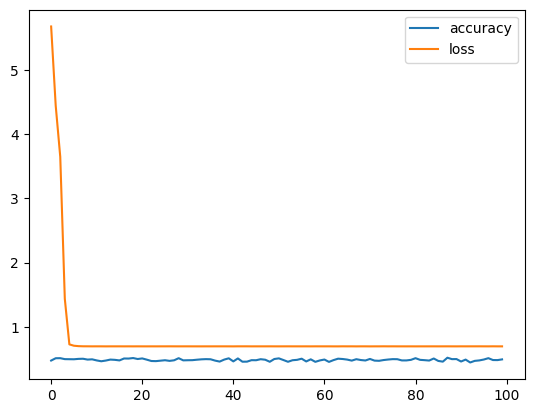

In [12]:
pd.DataFrame(loss.history).plot()

In [13]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 0.6930


[0.6932920813560486, 0.5]

##### Improve our model

- Add an extra `layer` and more `units`
- Using `activation` HyperParameter
- Change `optimizer`


In [14]:
# set random seed

tf.random.set_seed(42)



#                   1. Create a model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])



#                   2. Compile a model

model_2.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])



#                   3. Fitting a model

loss = model_2.fit(X, y, epochs = 300)     


Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4830 - loss: 1.7779
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4439 - loss: 0.8035
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3429 - loss: 0.7693 
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2920 - loss: 0.7590 
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2823 - loss: 0.7527
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2714 - loss: 0.7471 
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2879 - loss: 0.7412
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3127 - loss: 0.7355
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3373 - loss: 0.7293
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3660 - loss: 0.7226
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3942 - loss: 0.7145  
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

In [15]:
# Evaluate our model

model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 1.0000 - loss: 0.0042    


[0.0031962275970727205, 1.0]

<Axes: >

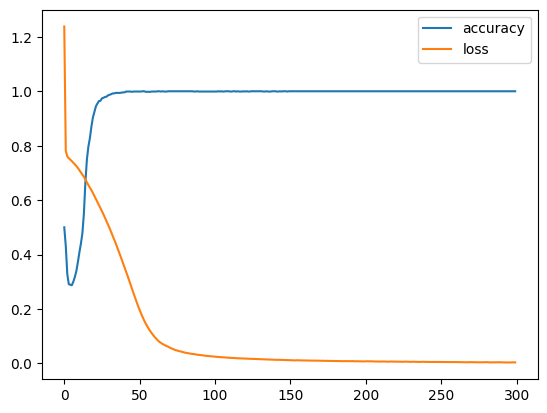

In [16]:
pd.DataFrame(loss.history).plot()

In [17]:
# Let's predict

predictions = model_2.predict(X)
predictions

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[ 1.6547222 ],
       [ 1.9933336 ],
       [ 1.3132776 ],
       [ 1.4693869 ],
       [-0.86768854],
       [ 1.1228063 ],
       [ 1.4399753 ],
       [ 1.64645   ],
       [ 1.690041  ],
       [-1.0924721 ],
       [ 1.1210806 ],
       [-0.92184746],
       [ 1.0684984 ],
       [ 1.5884559 ],
       [ 1.103228  ],
       [ 1.7277125 ],
       [-0.6989882 ],
       [ 1.7125853 ],
       [ 1.345841  ],
       [-0.5439779 ],
       [ 1.9524864 ],
       [-1.0808703 ],
       [-0.4296829 ],
       [ 1.6750805 ],
       [-0.85584307],
       [-0.07888789],
       [-0.87735975],
       [ 1.0724496 ],
       [ 1.3828472 ],
       [ 1.4245636 ],
       [-0.09951694],
       [-0.82270706],
       [ 1.6754633 ],
       [-0.86354756],
       [-1.3487015 ],
       [-1.2780004 ],
       [ 1.3553815 ],
       [ 1.0990771 ],
       [ 1.657327  ],
       [-0.39307404],
       [-0.40979093],
       [-0.6436584 ],
       [-0.5889081 ],
       [ 0.7833015 ],
       [-0.8328278 ],
       [-0

To visulize our model 's predictions, let's create a function `plot_decision_boundary()`, this function will:

- Take in a trained model, features (X) and labels (y)
- Create a meshgrid of the different X values
- Make predictions across the meshgrid
- Plot the predictions as well as a line between zones (where each unique class falls).


In [18]:
def plot_decision_boundary(model, X, y):

    """
        Plots the decision boundary created by a model predicting on X
    """

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
    y_min, y_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    

    # Create X values (we're going to make the predictions on these)

    x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together


    # Make predictions

    y_pred = model.predict(x_in)


    # Check for multi-class 

    if len(y_pred[0]) > 1:

        print("Doing Multi-Class Classification")

        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:

        print("Doing Binary Classification")
        y_pred = np.round(y_pred).reshape(xx.shape)


    # Plot the decision boundary

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing Binary Classification


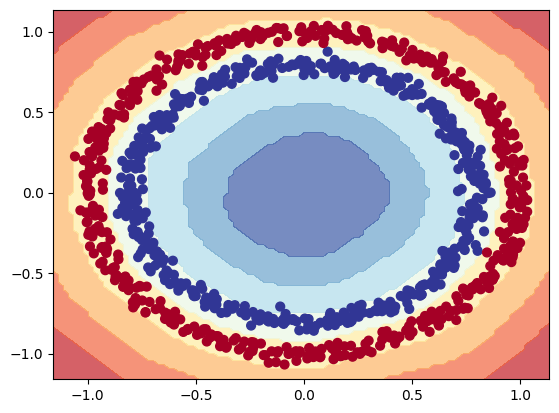

In [19]:
# check out the predictions our model is making

plot_decision_boundary(model = model_2,
                       X = X,
                       y = y)

### Non-linearity


In [20]:
# Set the random seed

tf.random.set_seed(42)



#                       1. Creating a model

model_3 = tf.keras.Sequential([

    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])



#                       2. Compile a model

model_3.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])



#                       3. Fit a model

loss = model_3.fit(X, y, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5118 - loss: 6.2513   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5118 - loss: 6.1897 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5111 - loss: 6.1700 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5114 - loss: 6.1663
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5119 - loss: 6.1139 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5119 - loss: 6.0990 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.5113 - loss: 6.0973
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5113 - loss: 6.0957 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5113 - loss: 6.0940 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.5113 - loss: 6.0925
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5110 - loss: 6.0829 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

In [21]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4595 - loss: 5.8762


[5.423311233520508, 0.48399999737739563]

<Axes: >

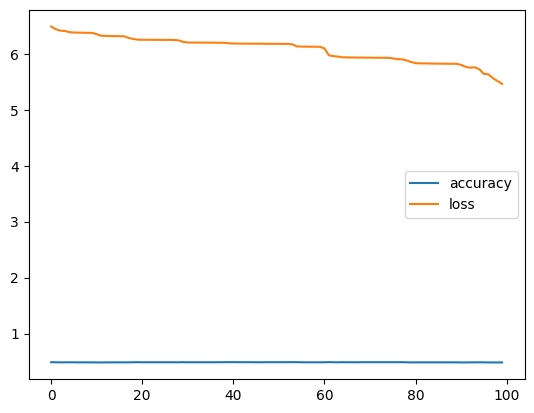

In [22]:
pd.DataFrame(loss.history).plot()

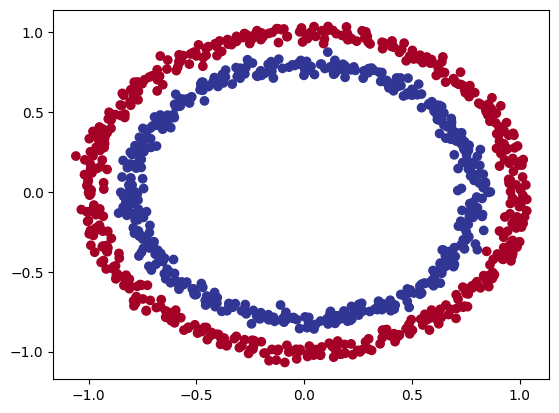

In [23]:
# How our data looks like

plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [24]:
# Check the decision boundary

model_3.predict(X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[-6.32725060e-01],
       [ 3.50541979e-01],
       [ 3.69018108e-01],
       [-3.38435978e-01],
       [ 5.37666380e-01],
       [-2.72068948e-01],
       [-6.64830148e-01],
       [-5.70367396e-01],
       [ 8.18400621e-01],
       [-7.89241850e-01],
       [ 8.88226449e-01],
       [-1.05419469e+00],
       [-6.26157880e-01],
       [-1.29388258e-01],
       [ 1.72555164e-01],
       [ 5.74398816e-01],
       [ 8.92114460e-01],
       [ 6.50609553e-01],
       [ 6.10265255e-01],
       [ 1.06305909e+00],
       [-7.45624363e-01],
       [-3.76226842e-01],
       [ 9.05098677e-01],
       [-6.64738059e-01],
       [ 1.78779438e-01],
       [ 4.19948667e-01],
       [-1.00019908e+00],
       [-3.41629952e-01],
       [ 5.42675316e-01],
       [ 3.14971395e-02],
       [ 1.00278676e+00],
       [-7.02326655e-01],
       [-6.61041319e-01],
       [-5.94224215e-01],
       [ 1.00863886e+00],
       [-9.42702740e-02],
       [-1.26382992e-01],
       [-8.66510391e-01],
       [ 5.1

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing Binary Classification


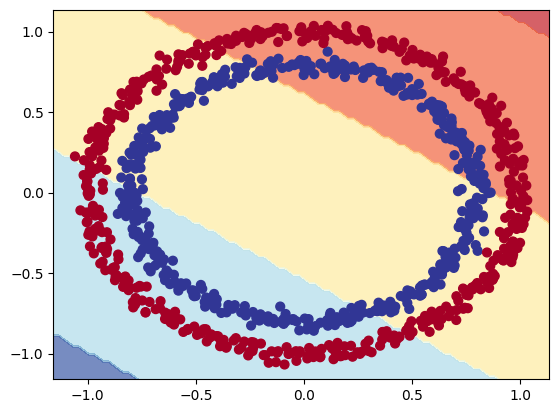

In [25]:
# Let's plot decision boundary

plot_decision_boundary(model = model_3,
                       X = X,
                       y = y)

### Let's built our first neural network with non-linear activation function


> using `tanh`


In [26]:
# Let's recreate our model

tf.random.set_seed(42)

#           1. Create model

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation = tf.keras.activations.tanh),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.tanh),
    tf.keras.layers.Dense(1, activation = tf.keras.activations.tanh)
])



#           2. compile model

model_4.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(0.01),
                metrics = ["accuracy"])



#           3. Fit model

history = model_4.fit(X, y, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4925 - loss: 2.9828
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5469 - loss: 0.6956 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5172 - loss: 0.6896
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5384 - loss: 0.6870 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5477 - loss: 0.6841
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5837 - loss: 0.6802 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5886 - loss: 0.6757
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5866 - loss: 0.6706
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5967 - loss: 0.6651
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5986 - loss: 0.6583 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6130 - loss: 0.6489 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accu

In [27]:
model_4.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9995 - loss: 0.0067


[0.006765350699424744, 0.9990000128746033]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing Binary Classification


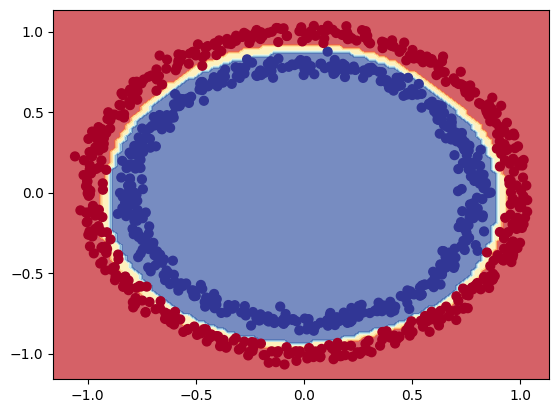

In [28]:
# let's plot decision boundary

plot_decision_boundary(model = model_4,
                       X = X,
                       y = y)

> using `relu`


In [29]:
tf.random.set_seed(42)

#           1. Create model

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])



#           2. Compile model

model_5.compile(loss = "binary_crossentropy",
                optimizer = tf._optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])



#           3. Fit model

history = model_5.fit(X, y, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5056 - loss: 0.6950
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5545 - loss: 0.6929
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5672 - loss: 0.6926
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5311 - loss: 0.6922 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5510 - loss: 0.6918 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5437 - loss: 0.6912 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5503 - loss: 0.6906 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5681 - loss: 0.6899
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5806 - loss: 0.6890 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5810 - loss: 0.6879
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6229 - loss: 0.6861 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc

In [30]:
model_5.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0072  


[0.007272594608366489, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing Binary Classification


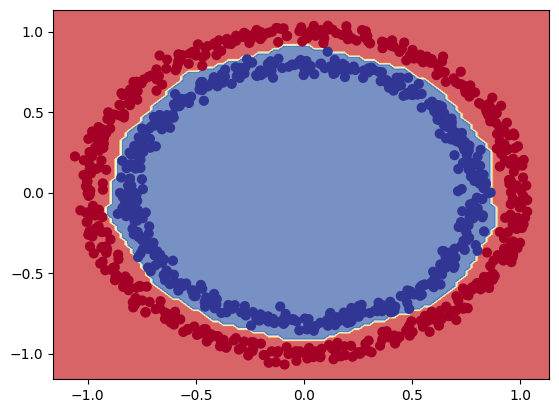

In [31]:
plot_decision_boundary(model = model_5,
                       X = X,
                       y = y)

> **Note:** The combination of **Linear (staright lines) and non—linear (non—straight lines) functions** is one of the key fundamentals of neural networks .

Now we 've discussed the concept of linear and non—linear functions, let's see them in action.


In [32]:
# create a toy tensor simmimlar to the one we have passed to the model

A = tf.cast(tf.range(-10, 10), tf.float32)

A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

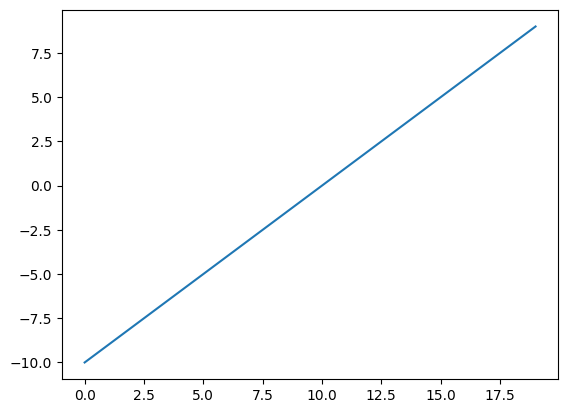

In [33]:
# Visualize of our data

plt.plot(A)

> `sigmoid`


In [34]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))

def sigmoid(X):
    
    return 1 / (1 + tf.exp(-X))

# use the function on our toy tensor

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

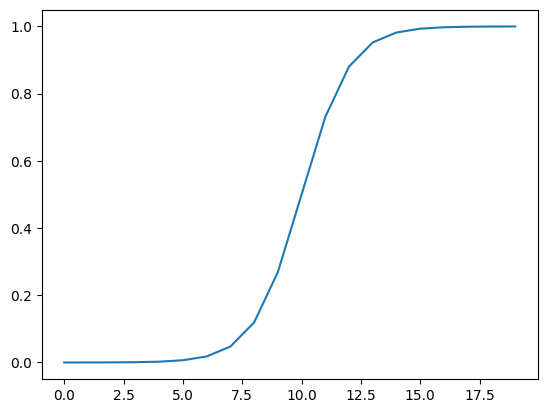

In [35]:
# plot our toy tensor transformed by sigmoid

plt.plot(sigmoid(A))

> `relu`


In [36]:
# Let's recreate relu

def relu(X):

    return tf.maximum(0, X);

# use the function on our toy tensor

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

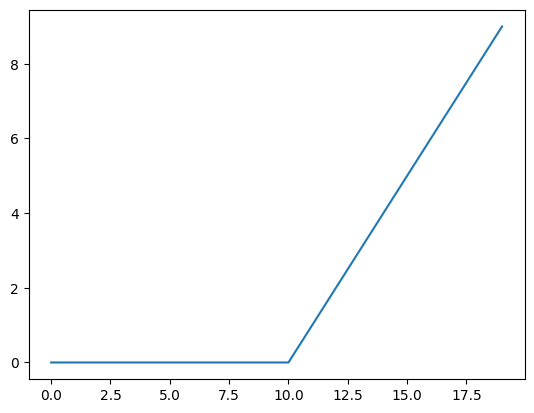

In [37]:
# let's plot our toy tensor transformed by relu

plt.plot(relu(A))

> `linear`


In [38]:
# recreate linear function

def linear(X):

    return X;

# use the linear function on our toy tensor

linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

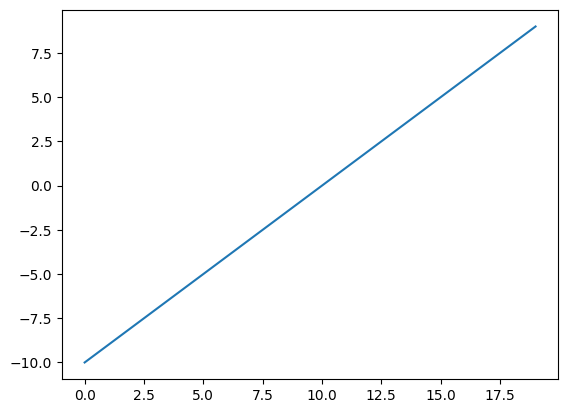

In [39]:
# plot our toy tensor transformed by linear function

plt.plot(linear(A))

### Evaluating and improving our classification

So far we've been training and testing on same dataset...

So let's create a trainning and test data


In [40]:
X_train, y_train = X[:800], y[:800]

X_test, y_test = X[800:], y[800:]

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [41]:
# let's recreate a model to fit on the training data and evaluate it on test data

# set random seed

tf.random.set_seed(42)


#                   1. Create model

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])



#                   2. Compile model

model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])



#                   3. Fit model

history = model_6.fit(X_train, y_train, epochs = 100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4550 - loss: 0.6984
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5130 - loss: 0.6887
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5523 - loss: 0.6789 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6683 - loss: 0.6581 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7477 - loss: 0.6150 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8578 - loss: 0.5380
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9262 - loss: 0.4247
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9636 - loss: 0.3104 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9743 - loss: 0.2131 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9888 - loss: 0.1506 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9925 - loss: 0.1092 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - ac

In [42]:
model_6.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9892 - loss: 0.0282  


[0.015258794650435448, 0.9950000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Doing Binary Classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing Binary Classification


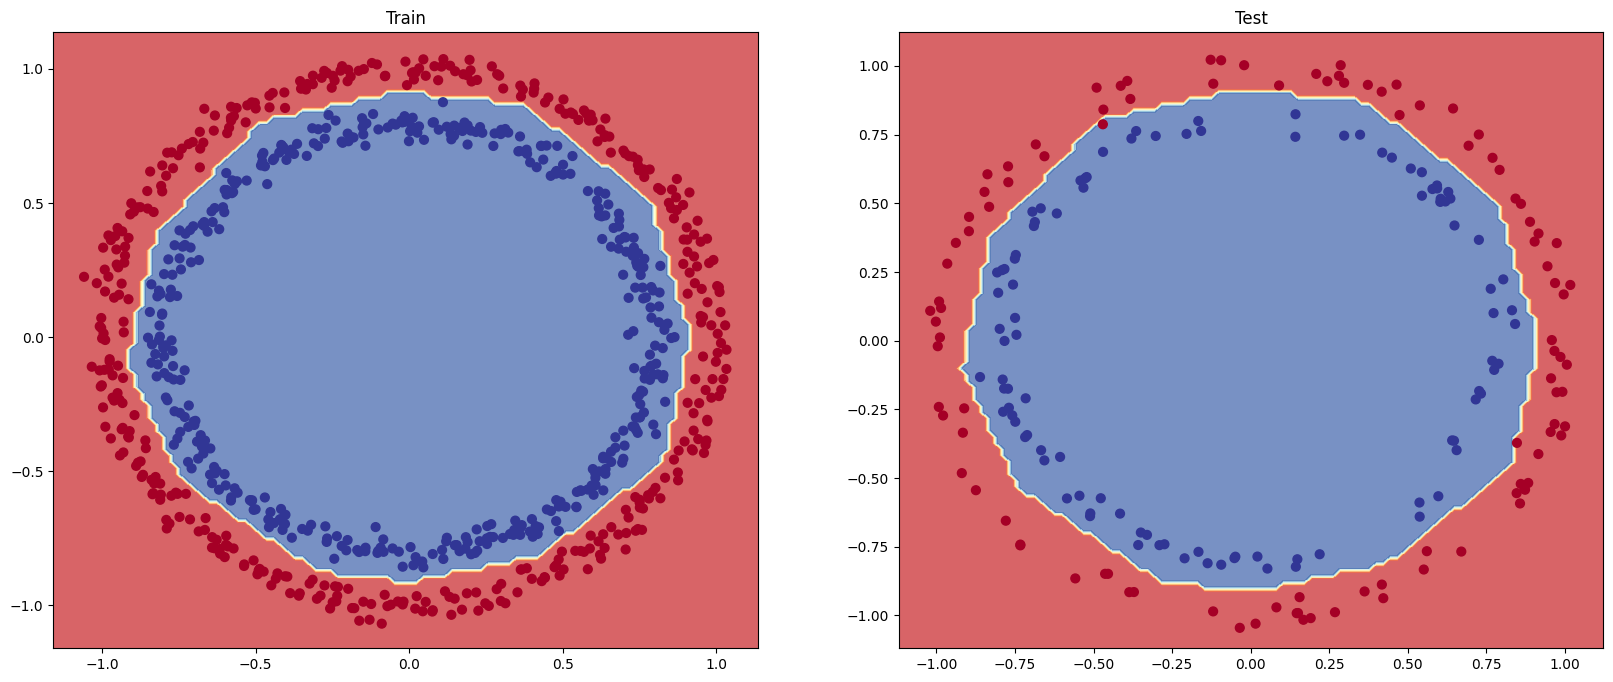

In [43]:
# plot teh decision boundary for both training and test data

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model = model_6,
                       X = X_train,
                       y = y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model = model_6,
                       X = X_test,
                       y = y_test)

In [44]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.46125,0.696016
1,0.52625,0.687501
2,0.56125,0.676517
3,0.69625,0.651749
4,0.76875,0.599478
...,...,...
95,1.00000,0.000965
96,1.00000,0.000952
97,1.00000,0.000939
98,1.00000,0.000927


### Plot the loss (or training) curves


<Axes: >

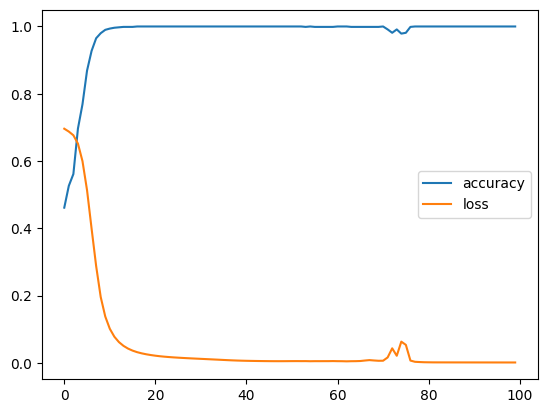

In [45]:
pd.DataFrame(history.history).plot()

### Finding the best Learning Rate

To find the ideal learning rate(where the loss decreases the most during the training) we're going to use the following steps:

- A learning rate **callback** - Callback is an extra functionality, you can add to your model _while_ it's training.

- A modified loss curved plot.


In [46]:
# Set random seed

tf.random.set_seed(42)


#           1. Create model

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])



#           2. Compile model

model_8.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics = ["accuracy"])


# Create a learning rate callback

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-4 * 10**(epochs/20))


#           3. Fit model

history_8 = model_8.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4925 - loss: 0.7050 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4934 - loss: 0.7043 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4972 - loss: 0.7036 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4957 - loss: 0.7028 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4790 - loss: 0.7020 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4878 - loss: 0.7012 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4910 - loss: 0.7004 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4908 - loss: 0.6995 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4822 - loss: 0.6987 - learning_

<Axes: xlabel='Epochs'>

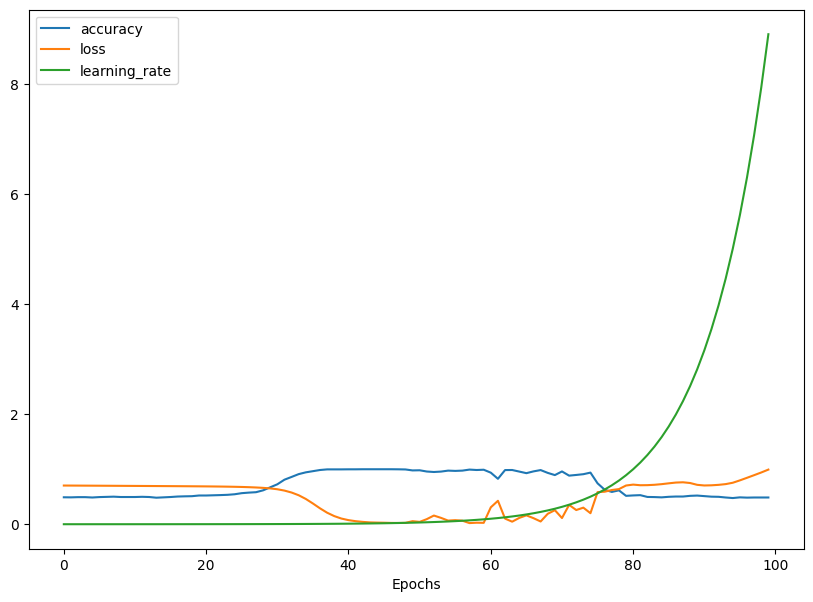

In [47]:
pd.DataFrame(history_8.history).plot(figsize = (10, 7), xlabel = "Epochs")

In [48]:
lrs = 1e-4 * ( 10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0.5, 1.0, 'Learning Rate VS Loss')

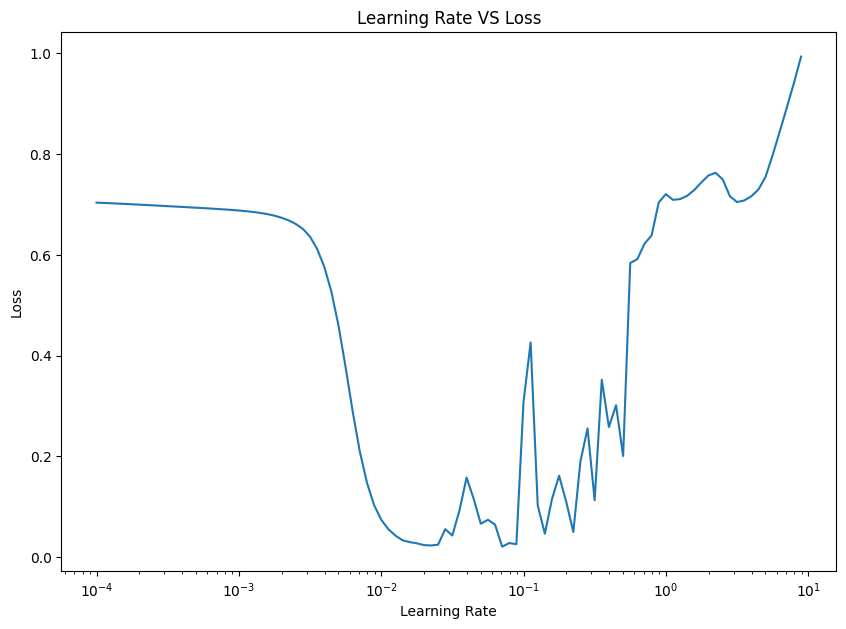

In [49]:
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_8.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title("Learning Rate VS Loss")

In [50]:
# set seed

tf.random.set_seed(42)

#                   1. Create model

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(8, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])



#                   2. Compile model with the ideal learning rate 

model_9.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(0.01),
                metrics = ["accuracy"])



#                   3. Fit model

history_9 = model_9.fit(X_train, y_train, epochs = 80)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5108 - loss: 0.6944
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5658 - loss: 0.6826
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - loss: 0.6705 
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7850 - loss: 0.6444
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7861 - loss: 0.5921 
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8723 - loss: 0.5035 
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9436 - loss: 0.3981 
Epoch 8/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9659 - loss: 0.2997 
Epoch 9/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9821 - loss: 0.2222
Epoch 10/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9880 - loss: 0.1690 
Epoch 11/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9909 - loss: 0.1332 
Epoch 12/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.99

In [51]:
model_9.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9931 - loss: 0.0176  


[0.02026061713695526, 0.9900000095367432]

<Axes: >

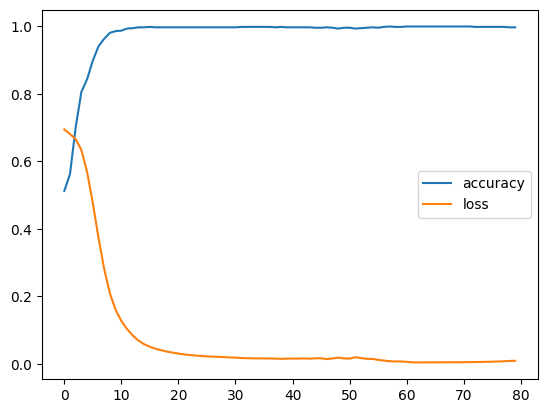

In [52]:
pd.DataFrame(history_9.history).plot()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Doing Binary Classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing Binary Classification


Text(0.5, 1.0, 'Test Data')

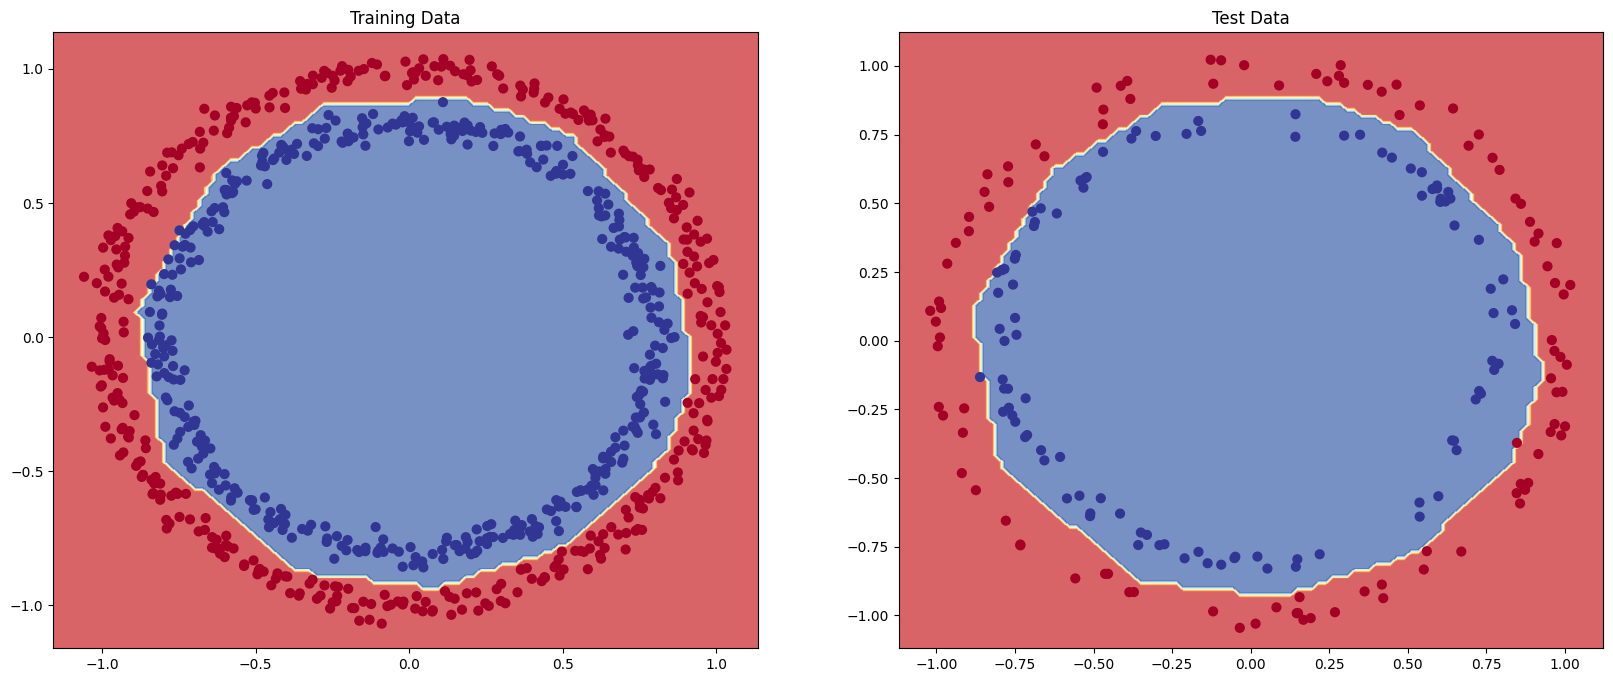

In [53]:
plt.figure(figsize = (20, 8))
plt.subplot(1, 2 ,1)
plot_decision_boundary(model = model_9,
                       X = X_train,
                       y = y_train)
plt.title("Training Data")

plt.subplot(1, 2, 2)
plot_decision_boundary(model = model_9,
                       X = X_test,
                       y = y_test)
plt.title("Test Data")

## More classification evaluation methods

Alongside Visualizing our models results as much as possible, there are handful of other classification evaluation methods & metrics yuo should be familiar with:

* Accuracy.
* Precision.
* Recall.
* F1-score.
* Confusion Matrix.
* Classification report (from scikit-learn).


In [54]:
loss, accuracy = model_9.evaluate(X_test, y_test)
print(f"Model loss on test data : {loss}")
print(f"Model accuracy on the test data : {(accuracy * 100):.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9931 - loss: 0.0176 
Model loss on test data : 0.02026061713695526
Model accuracy on the test data : 99.00%


In [55]:
y_pred = model_9.predict(X_test)

y_pred[:10]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[9.9979281e-01],
       [1.0000000e+00],
       [9.9999678e-01],
       [9.9994618e-01],
       [7.2089485e-03],
       [1.6773239e-04],
       [9.3874395e-01],
       [1.1600541e-06],
       [9.9999934e-01],
       [4.5326109e-05]], dtype=float32)

Our predictions array has come out in **Prediction Probability** form... the standard output from the sigmoid (or softmax) activation functions

In [56]:
# Convert Prediction Probability into Binary Format and view first 10

y_pred = tf.round(y_pred)

y_pred[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [57]:
confusion_matrix(y_test, y_pred)

array([[100,   1],
       [  1,  98]], dtype=int64)

#### Pretify Our Confusion Matrix

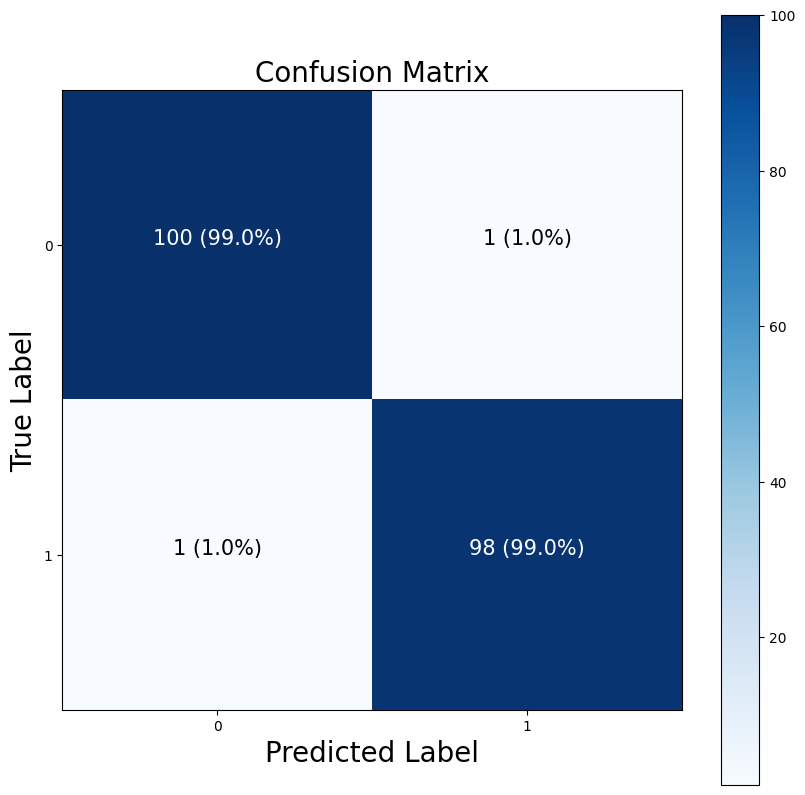

In [67]:
# Create confusion Matrix

cm = confusion_matrix(y_test, y_pred)
cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
n_classes = cm.shape


# Let's prettify it 

fig, ax = plt.subplots(figsize = (10, 10))

# Create a matrix plot

cax = ax.matshow(cm, cmap = plt.cm.Blues)
fig.colorbar(cax)

# Create Classes

classes = False

if classes:
    labels = classes

else:
    labels = np.arange(cm.shape[0])

# Label the axis

ax.set(title = "Confusion Matrix",
       xlabel = "Predicted Label",
       ylabel = "True Label",
       xticks = np.arange(n_classes[0]),
       yticks = np.arange(n_classes[1]),
       xticklabels = labels,
       yticklabels = labels)

# set X_axis to bottom

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for differnet colors

threshold = (cm.max() / cm.min()) / 2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
    horizontalalignment = "center",
    color = "white" if cm[i, j] > threshold else "black",
    size = 15
  )

In [1]:
# Creating function for the ploting the confusion matrix

def plot_confusion_matrix(y_pred,
                          y_test):

    # Create confusion Matrix

    cm = confusion_matrix(y_test, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis = 1)[:, np.newaxis]
    n_classes = cm.shape


    # Let's prettify it 

    fig, ax = plt.subplots(figsize = (10, 10))

    # Create a matrix plot

    cax = ax.matshow(cm, cmap = plt.cm.Blues)
    fig.colorbar(cax)

    # Create Classes

    classes = False

    if classes:
        labels = classes

    else:
        labels = np.arange(cm.shape[0])

    # Label the axis

    ax.set(title = "Confusion Matrix",
           xlabel = "Predicted Label",
           ylabel = "True Label",
           xticks = np.arange(n_classes[0]),
           yticks = np.arange(n_classes[1]),
           xticklabels = labels,
           yticklabels = labels)

    # set X_axis to bottom

    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size

    ax.yaxis.label.set_size(20)
    ax.xaxis.label.set_size(20)
    ax.title.set_size(20)

    # Set threshold for differnet colors

    threshold = (cm.max() / cm.min()) / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
        horizontalalignment = "center",
        color = "white" if cm[i, j] > threshold else "black",
        size = 15
      )